## Load data and import library

In [1]:
import pandas as pd
import numpy as np

#--Thinking of missing values from beginning----------
#--pd.read_csv recogonize N/A and empty cell as missing values----
#--But I usually added the following as other types of missing values-------
#--In this imdb dataset, it does not have the folloiwng type----
#--But it won't hurt to implement it anyways-------
missing_values=['n/a','na','Na','N/a','-','--','---']

#--Load data---
rawdata=pd.read_csv('dataset_interview_M4.csv',na_values=missing_values)

#--Total number of examples------
m=rawdata.shape[0]

#--Total number of features----
n_features=rawdata.shape[1]

#--Output--
print("Total number of given examples is {}".format(m))
print("Total number of given features is {}".format(n_features))
print("Name of each feature is:")
print(rawdata.columns)

#--If you do data.describe(), it only presents continueous number----

Total number of given examples is 7411
Total number of given features is 16
Name of each feature is:
Index(['imdb_id', 'original_title', 'budget', 'genres', 'production_companies',
       'production_countries', 'homepage', 'original_language', 'poster_path',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'vote_average', 'vote_count'],
      dtype='object')


## Missing values
* I will get an idea of how many missing values it has, and deal with it case by case
* Missing value types here are: empty cell, and missing_values list

In [2]:
#--Find total missing values for each feature (each column)----
print("Number of missing values of each feature")
print(rawdata.isnull().sum())

Number of missing values of each feature
imdb_id                    0
original_title             0
budget                     0
genres                     0
production_companies       3
production_countries       3
homepage                5042
original_language          0
poster_path                5
release_date               4
revenue                    3
runtime                    9
spoken_languages           3
status                     5
vote_average               3
vote_count                 3
dtype: int64


## Numerical field
### Budget, Revenue, Rumtime, Vote_average, Vote_count
* After describe(),count<7411 indicates missing field for revenue,runtime,vote_average,vote_count
* min=1 in revenue, treat as missing info value
* min=0 in budget,runtime,vote_average,vote_count indicate missing info value

In [3]:
num_data=rawdata[['budget','revenue','runtime','vote_average','vote_count']]

"""EDA of numerical data"""
print(num_data.head())

##---describe() gives info of missing values, number 0, etc...
print(num_data.describe())

     budget      revenue  runtime  vote_average  vote_count
0  30000000  373554033.0     81.0           7.7      5415.0
1  65000000  262797249.0    104.0           6.9      2413.0
2  16000000   81452156.0    127.0           6.1        34.0
3         0   76578911.0    106.0           5.7       173.0
4  60000000  187436818.0    170.0           7.7      1886.0
             budget       revenue      runtime  vote_average    vote_count
count  7.411000e+03  7.408000e+03  7402.000000   7408.000000   7408.000000
mean   2.257740e+07  6.878739e+07   107.711429      6.217549    559.262959
std    3.692513e+07  1.464203e+08    21.474424      1.027832   1105.994968
min    0.000000e+00  1.000000e+00     0.000000      0.000000      0.000000
25%    0.000000e+00  2.400000e+06    94.000000      5.700000     41.000000
50%    7.500000e+06  1.682272e+07   104.000000      6.300000    160.000000
75%    2.800000e+07  6.722707e+07   118.000000      6.900000    541.000000
max    3.800000e+08  2.787965e+09   338.

### Missing information value
* 2030 samples has budget=0, so I am hesitant to remove all of them
* All revenue=1 sample comes with budget=0 or 500, meaningless, remove all revenue=1 rows

In [46]:
#--number of sample that has budget=0
print((num_data['budget']==0).sum())
#--number of sample that has revenue=1
print((num_data['revenue']==1).sum())
print((num_data['runtime']==0).sum())
print((num_data['vote_count']==0).sum())

2030
12
21
37


### Remove set whose field is meaningless, then describe()
* end up with 5191 data set, descent to work with

In [5]:
"""Remove all missing information values and then describe()"""
num_data_new=num_data.loc[(num_data['budget']>1000) & (num_data['revenue']>1000) & (num_data['runtime']>0) & (num_data['vote_count']>10)]
print(num_data_new.describe())

             budget       revenue      runtime  vote_average    vote_count
count  5.047000e+03  5.047000e+03  5047.000000   5047.000000   5047.000000
mean   3.291256e+07  9.601121e+07   110.196751      6.315177    779.533584
std    4.080138e+07  1.699897e+08    21.273392      0.855705   1278.185945
min    5.000000e+03  1.938000e+03    26.000000      2.300000     11.000000
25%    6.500000e+06  9.600000e+06    96.000000      5.800000    100.000000
50%    1.900000e+07  3.457378e+07   106.000000      6.400000    309.000000
75%    4.000000e+07  1.068777e+08   120.000000      6.900000    866.000000
max    3.800000e+08  2.787965e+09   338.000000      9.100000  14075.000000


### pairplot to watch for mutal relationalship
* No obvious linear relation, indicate these features are independent
* budget, revenue, votecount has outlier (not too normally distributed)
* Don't see cluster pattern at this 2D level

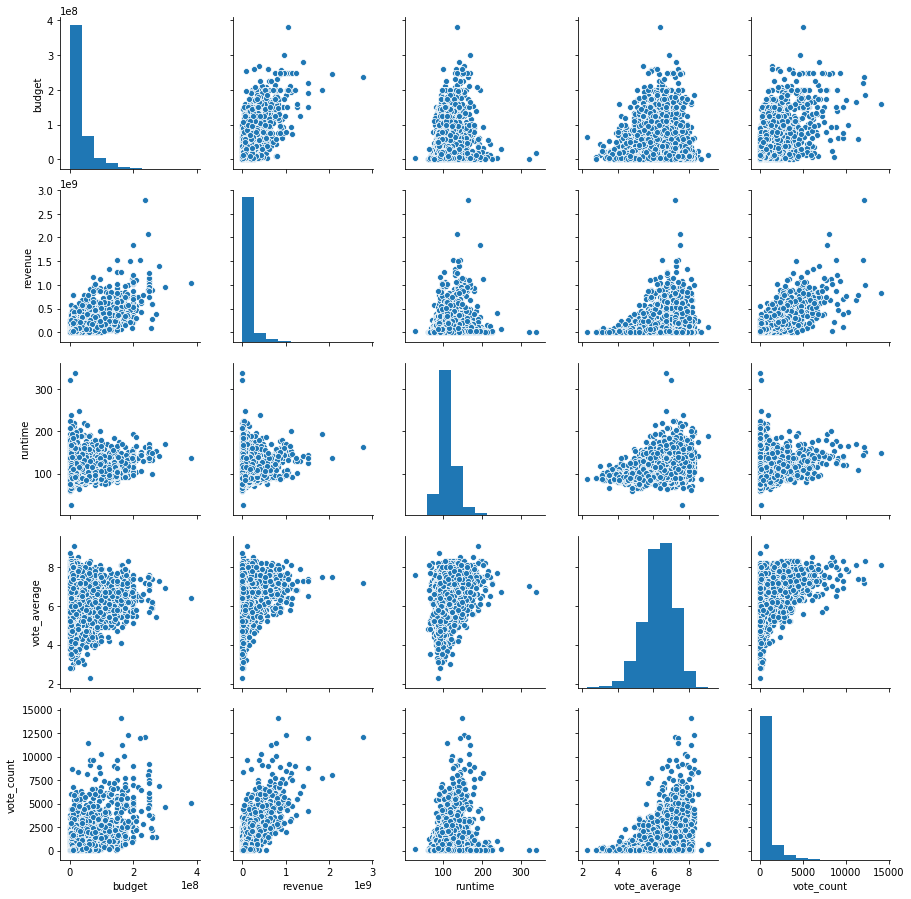

In [59]:
from seaborn import pairplot
pairplot(num_data_new)

## Genre field, deal with json notation strings
* Assume id is all integer like string
* Assume name string has no special characters

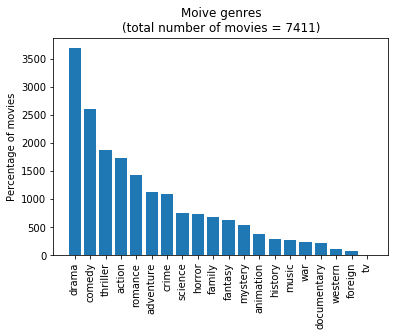

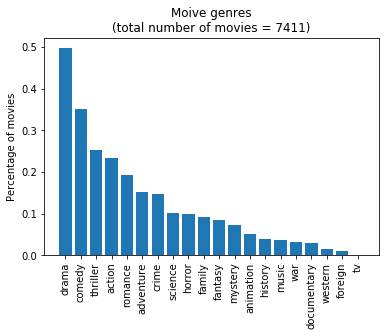

In [14]:
from imdb_class import *
import matplotlib.pyplot as plt
%matplotlib inline

"""Generes field"""
genres=rawdata['genres'].values
genres_count=create_count_summary(genres)

genres_val_list=list(genres_count.values())
genres_percent=[i/m for i in genres_val_list]

"""Output Genres plot"""
plt.bar(range(len(genres_count)), genres_val_list, align='center')
plt.xticks(range(len(genres_count)), list(genres_count.keys()))
plt.xticks(rotation=90)
plt.ylabel("Percentage of movies")
plt.title("Moive genres\n(total number of movies = {})".format(m))

plt.show()

"""Output Genres counts plot"""
plt.bar(range(len(genres_count)), genres_percent, align='center')
plt.xticks(range(len(genres_count)), list(genres_count.keys()))
plt.xticks(rotation=90)
plt.ylabel("Percentage of movies")
plt.title("Moive genres\n(total number of movies = {})".format(m))

plt.show()

## production_companies field, deal with json notation strings

Results: there are 7090 different production companies



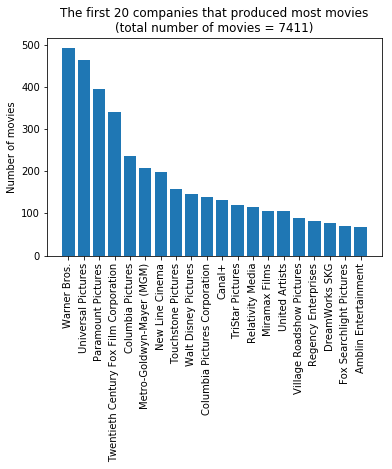

In [23]:
"""Production_companies field"""
prodcom=rawdata['production_companies'].values
prod_count=create_count_summary_prodcom(prodcom)

#--Total number of types of production numbers-------
tot_prodcom=len(list(prod_count))
print("Results: there are {} different production companies\n".format(tot_prodcom))

#--Get the first twenty counts---
first20 = {k: prod_count[k] for k in list(prod_count)[:20]}
#morethan20 = {k: prod_count[k] for k in list(prod_count) if prod_count[k]>20}
first20_val_list=list(first20.values())
first20_percent=[i/m for i in first20_val_list]

"""Output plots"""
plt.bar(range(len(prod_count_first20)), first20_val_list, align='center')
plt.xticks(range(len(prod_count_first20)), list(prod_count_first20.keys()))
plt.xticks(rotation=90)
plt.ylabel("Number of movies")
plt.title("The first 20 companies that produced most movies\n(total number of movies = {})".format(m))

plt.show()